In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

from importlib import reload
import src.data
import src.graph_utils
import src.cascade_failure
import src.visualization
reload(src.cascade_failure)
reload(src.data)
reload(src.graph_utils)
reload(src.visualization)

from src.data import load_data
from src.graph_utils import calculate_edge_lengths, assign_grid_attributes
from src.cascade_failure import cascade_failure, cascade_simulation
from src.visualization import draw_graph, draw_graph_after_failure


In [7]:
G = load_data()

Graph loaded: 4941 nodes, 6594 edges


{8: [-0.47636353, 0.84697391], 6: [-0.46103965, 0.87625013], 7: [-0.44286497, 0.86248309], 9: [-0.51394334, 0.80726772], 10: [-0.54091005, 0.78653983], 13: [-0.62515378, 1.21771892], 5: [-0.64033359, 1.2279699], 12: [-0.62225221, 1.25290839], 14: [-0.68733234, 1.23912697], 15: [-0.60276396, 1.24048325], 16: [-0.67496422, 1.27106322], 17: [-0.69772971, 1.27278825], 19: [-0.74383364, 1.09164436], 18: [-0.73577977, 1.11615716], 20: [-0.75267267, 1.02395625], 29: [-0.71575518, 1.20589668], 34: [-0.79844258, 0.73898561], 33: [-0.81635608, 0.7226469], 35: [-0.83142904, 0.7609491], 36: [-0.76415418, 0.86092761], 37: [-0.76195365, 0.83764807], 38: [-0.78779406, 0.84473496], 39: [-0.7880513, 0.86914743], 42: [-0.53279558, 0.89476036], 41: [-0.56336493, 1.00034152], 47: [-0.69554032, 0.89417637], 44: [-0.68442922, 0.91311592], 45: [-0.70903819, 0.91429828], 46: [-0.80311205, 0.90750019], 50: [-0.57027991, 0.77202865], 51: [-0.65288573, 1.16567864], 21: [-0.66721109, 1.19584214], 53: [-0.27689742

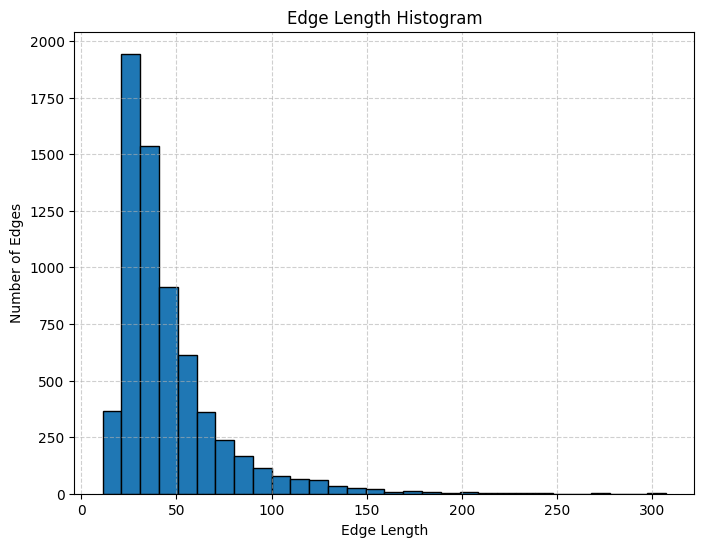

Maximum edge length: 307.4984630342002
Minimum edge length: 11.157521943213933


In [8]:
# edge lengths
calculate_edge_lengths(G)

edge_lengths = list(nx.get_edge_attributes(G, 'length').values())

plt.figure(figsize=(8, 6))
plt.hist(edge_lengths, bins=30, edgecolor='black')

plt.title("Edge Length Histogram")
plt.xlabel("Edge Length")
plt.ylabel("Number of Edges")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print("Maximum edge length:", max(edge_lengths))
print("Minimum edge length:", min(edge_lengths))

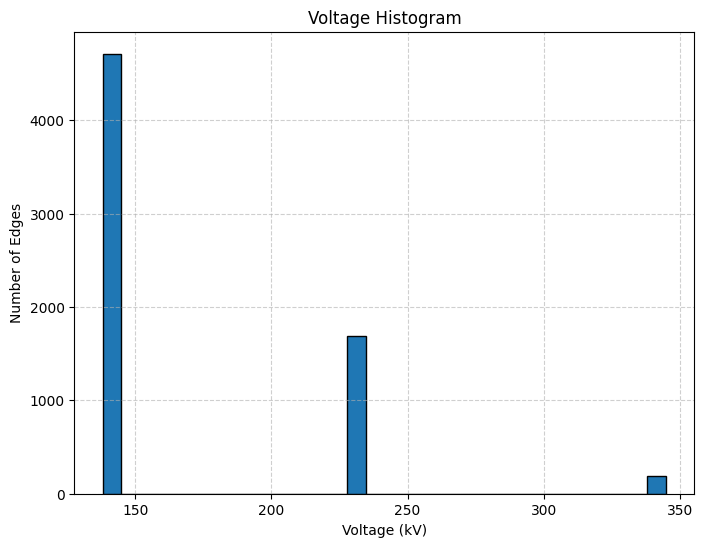

In [4]:
assign_grid_attributes(G)
voltage = list(nx.get_edge_attributes(G, 'voltage_kV').values())

plt.figure(figsize=(8, 6))
plt.hist(voltage, bins=30, edgecolor='black')

plt.title("Voltage Histogram")
plt.xlabel("Voltage (kV)")
plt.ylabel("Number of Edges")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


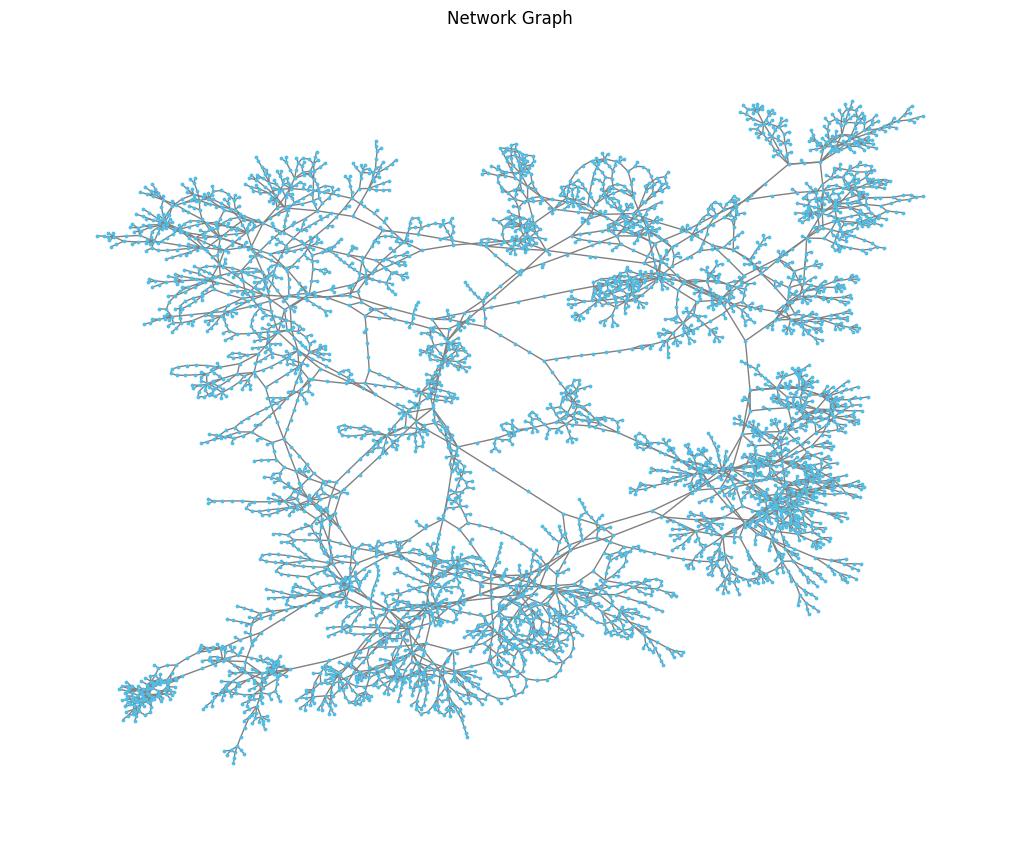

In [5]:
draw_graph(G)

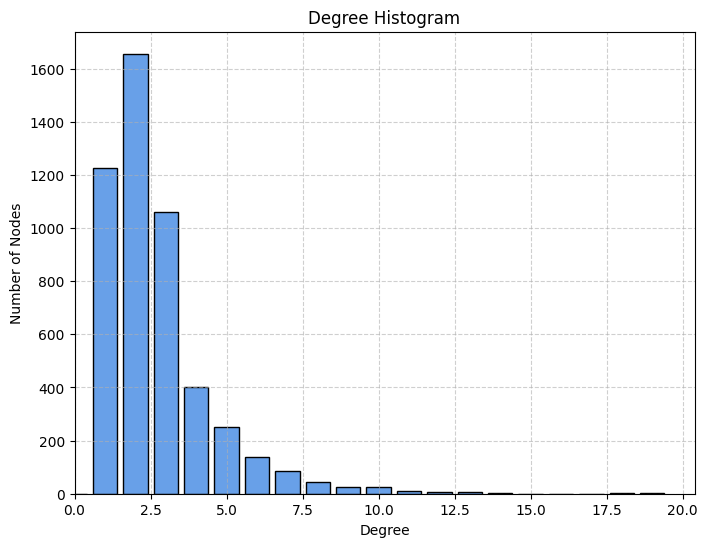

In [6]:
# Degree histogram
degree_hist = nx.degree_histogram(G)
degrees = range(len(degree_hist))
counts = degree_hist

plt.figure(figsize=(8, 6))
plt.bar(degrees, counts, width=0.80, color='#68a0e8', edgecolor='black')

plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(left=0)
plt.show()